# TF-IDF and K-Means Clustering
### Applied to the titles of 12,000 Etsy listings

### Note: is 13 clusters too crazy? The graph does not show clear clusters. Test on one of the other sets of data to see if its reasonable?

In [1]:
# import libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# import libraries for algorithm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
# import the dataset
df = pd.read_csv('data/titles-cleaned041022.csv')

In [4]:
df

,Unnamed: 0,title_listing
0,0,"['matte', 'black', 'mug']"
1,1,"['sample', 'second', 'sale', 'mug', 'coffee', ..."
2,2,"['mug', 'coffee', 'mug', 'tea', 'mug']"
3,3,"['espresso', 'cup', 'sake', 'cup', 'tumbler']"
4,4,"['mug', 'coffee', 'mug', 'tea', 'mug']"
...,...,...
11251,11251,"['plate', 'legs', 'organiser', 'small', 'fruit..."
11252,11252,"['vintage', 'art', 'object', 'letter', 'holder..."
11253,11253,"['jug', 'incised', 'design', 'milk', 'jug', 't..."
11254,11254,"['lava', 'fleck', 'vase']"


In [5]:
# remove the punctuation
df['title_string'] = df['title_listing'].apply(lambda x: re.sub("[^A-Za-z]+", " ", x))

In [6]:
# change the dataframe column to a series to use with the model
title = df['title_string']

TD-IDF Vectorization

In [7]:
# initialize the vectorizer
vector = TfidfVectorizer(sublinear_tf=True, min_df=0.005, max_df=0.4)

In [8]:
# Apply vectorizer and save array of vectors in V
V = vector.fit_transform(title)

In [9]:
V.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Apply K-means algorithm

### Find optimal number of clusters k Using the Elbow Method
Source: https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f

In [10]:
Sum_of_squared_distances = []
K = range(1,40)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(V)
    Sum_of_squared_distances.append(km.inertia_)

### NOTE: Where is the elbow?

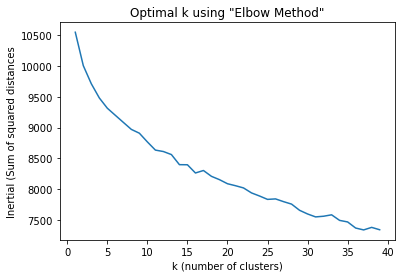

In [11]:
# plot the k values vs the inertia values
sns.lineplot(x=K, y=Sum_of_squared_distances)
plt.xlabel('k (number of clusters)')
plt.ylabel('Inertial (Sum of squared distances')
plt.title('Optimal k using "Elbow Method"')
plt.show()

In [12]:
# define a function that will find the top words for each cluster
def top_words(n):
    words_df = pd.DataFrame(V.todense()).groupby(clusters).mean()
    words = vector.get_feature_names()
    for i,r in words_df.iterrows():
        print('\nCluster {}'.format(i))
        print(', '.join([words[w] for w in np.argsort(r)[::-1][:n]]))

In [51]:
# intialize k-means
kmeans = KMeans(n_clusters=13, random_state=42)

In [52]:
# fit the model to the vectors
kmeans.fit(V)

KMeans(n_clusters=13, random_state=42)

In [53]:
# store cluster labels in a variable
clusters = kmeans.labels_

#look at the cluster labels
[c for c in clusters][:20]

[1, 1, 1, 2, 1, 6, 11, 11, 8, 8, 3, 0, 1, 1, 8, 0, 10, 8, 0, 3]

In [54]:
# add clusters to the dataframe
df['cluster'] = clusters.tolist()

Dimension Reduction and Visualization

In [55]:
# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)

# pass the vectors to the pca and store the vectors
vectorsPCA = pca.fit_transform(V.toarray())

In [56]:
# save the two dimensions
xD = vectorsPCA[:, 0]
yD = vectorsPCA[:, 1]

In [57]:
# add vectors and clusters to the dataframe
df['cluster'] = clusters
df['xD'] = xD
df['yD'] = yD

In [58]:
top_words(10)


Cluster 0
vase, flower, bud, blue, white, small, vintage, decor, black, home

Cluster 1
mug, coffee, tea, large, gift, blue, cup, unique, green, white

Cluster 2
cup, coffee, mug, tea, espresso, tumbler, blue, white, gift, green

Cluster 3
bowl, serving, blue, soup, salad, large, white, small, cereal, fruit

Cluster 4
mugs, cups, set, coffee, espresso, tea, mug, gift, two, blue

Cluster 5
platter, tray, serving, plate, large, dish, oval, decorative, gift, white

Cluster 6
plate, dinner, serving, plates, dinnerware, tableware, small, set, dessert, blue

Cluster 7
pendant, earrings, charms, jewelry, flowers, blue, matte, porcelain, floral, gift

Cluster 8
holder, jar, blue, vintage, jug, pitcher, tumbler, white, art, green

Cluster 9
pot, planter, succulent, plant, hanging, blue, small, green, white, vintage

Cluster 10
dish, soap, butter, trinket, ring, bowl, dispenser, holder, jewellery, white

Cluster 11
set, bowls, dinnerware, plates, bowl, dinner, blue, two, serving, dishes

Cluste

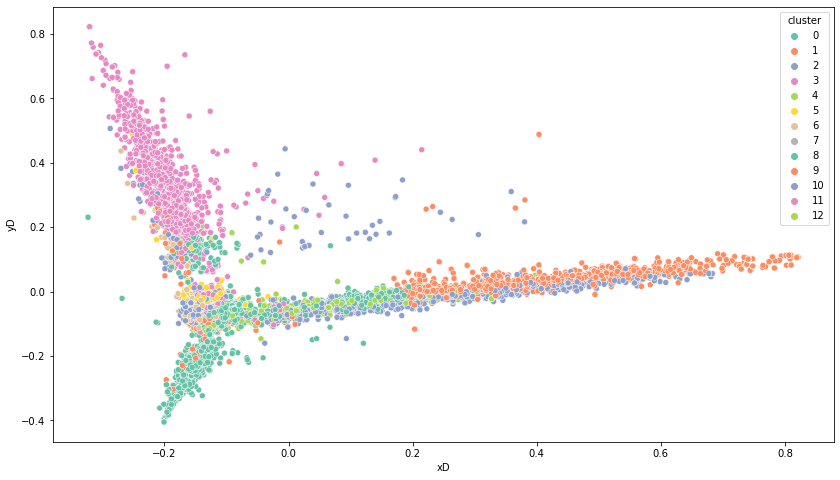

In [59]:
# plot the clusters
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x="xD", y="yD", hue='cluster', palette="Set2")
plt.show()

In [50]:
# Use top words to assign categories to the clusters
#categories = {0:'Mug', 1:'Plate', 2:'Small Mug/Cup', 3:'Jewelry', 4:'Multiple Pieces', 5:'Vase', 6:'Bowl', 7:'Small Dish'}

## Ask for help with this one:

In [23]:
for i in range (0, len(df)):
    df['category'][i] = categories[df['cluster'][i]]

KeyError: 'category'